# Images for Mike
Takes an image, navigates it, and then saves the navigated image to a fits file.

In [1]:
#RUN ME BEFORE ANYTHING ELSE!!! I import all of the required modules and functions!!
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()
print('Imported and initialised matplotlib...')
import astropy.io.fits as ast
print('Imported Astropy...')
from MapFunc import *
print('Imported User Defined Functions...')
from tools.mapping import *
from tools.image import *
print("Imported Oliver King's tools, v1.4 ...")
col = 'viridis'
xcol = 'red'
lvls = 1000
print("Graphical Parameters initialised...")
print('All Modules Imported Successfully!')

Imported and initialised matplotlib...
Imported Astropy...
Imported User Defined Functions...
Imported Oliver King's tools, v1.4 ...
Graphical Parameters initialised...
All Modules Imported Successfully!


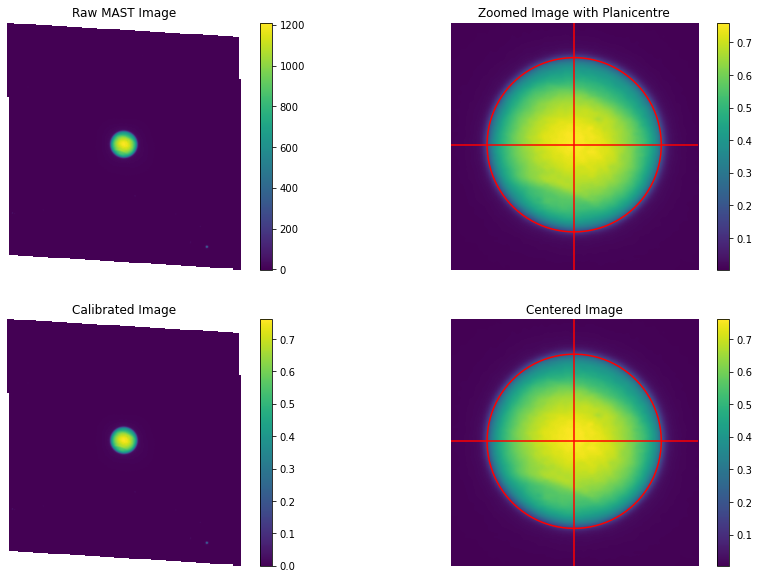

Planicentre is at: (166.6127503320399, 164.60920857313994, 117.75869999999999)
North Polar Correction Angle: -199.33477512470336


In [2]:
Year = '2020'
wavlng = '467'
SolFlux = 2019.04
Filename = 'ie0l24pdq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

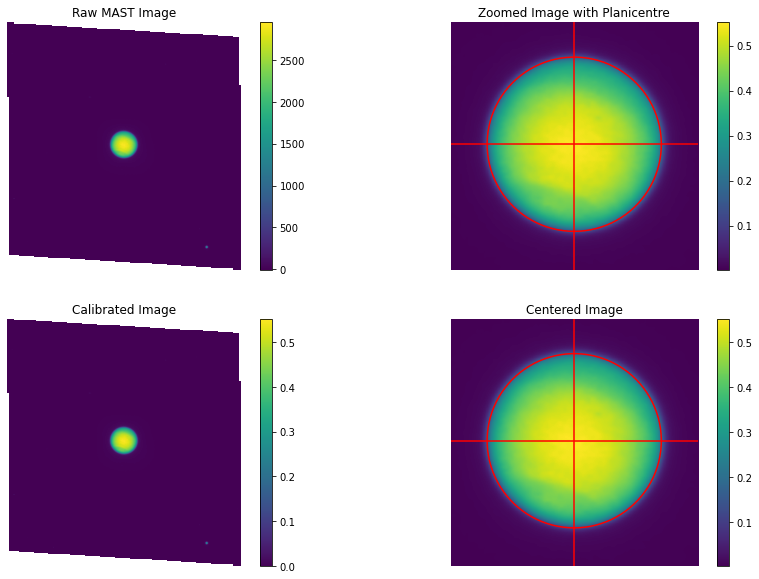

Planicentre is at: (166.67423635453179, 164.07879318978468, 117.75874999999999)
North Polar Correction Angle: -199.33477512251636


In [3]:
Year = '2020'
wavlng = '547'
SolFlux = 1859.82
Filename = 'ie0l24peq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

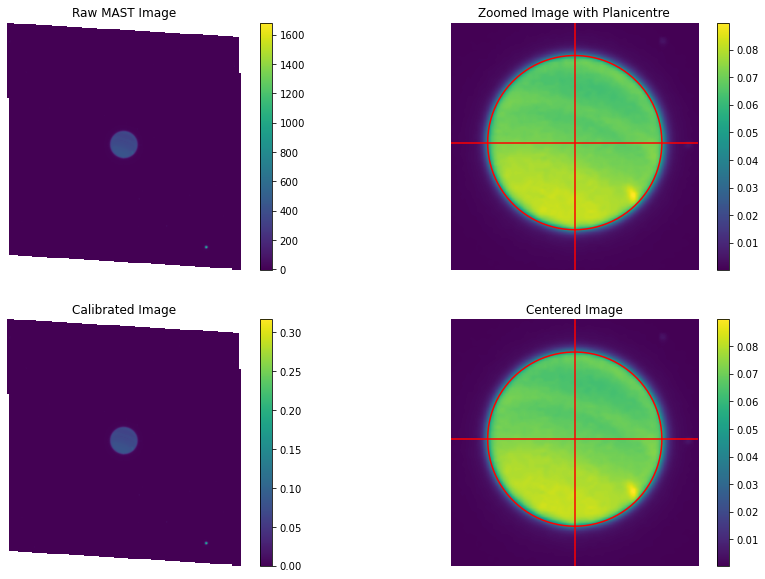

Planicentre is at: (167.3960284835007, 161.81456522227464, 117.75885)
North Polar Correction Angle: -199.33467511809812


In [29]:
Year = '2020'
wavlng = '763'
SolFlux = 1541.91
Filename = 'ie0l24pgq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

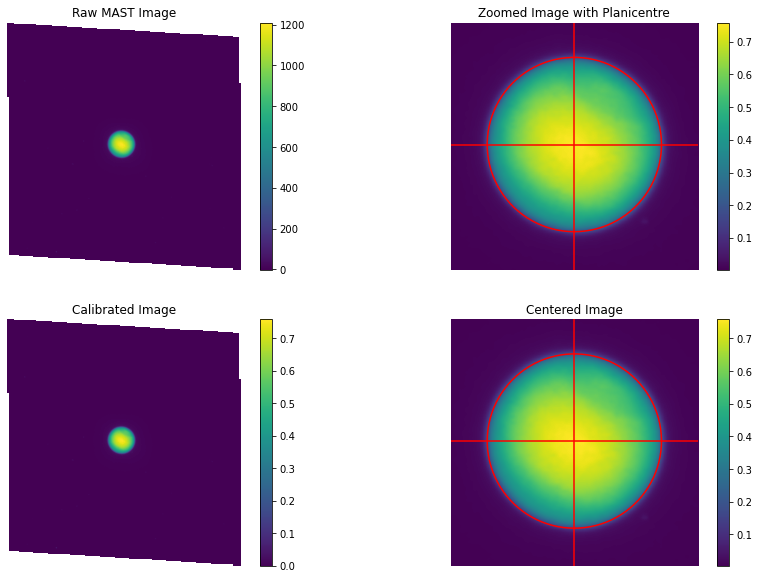

Planicentre is at: (166.831871912263, 164.30169938697912, 117.80664999999999)
North Polar Correction Angle: -393.0832753225591


In [5]:
Year = '2019'
wavlng = '467'
SolFlux = 2019.04
Filename = 'iduy25mnq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

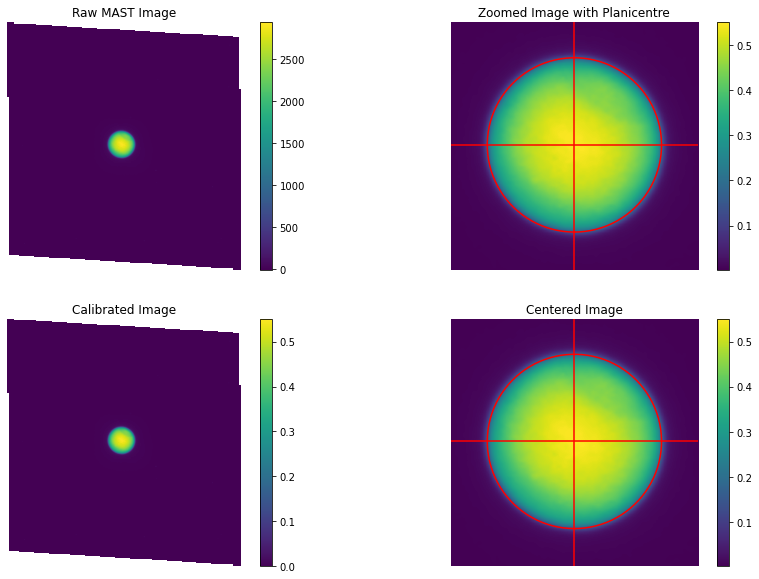

Planicentre is at: (166.91041210432013, 164.98106211427435, 117.80664999999999)
North Polar Correction Angle: -393.0831753248995


In [6]:
Year = '2019'
wavlng = '547'
SolFlux = 1859.82
Filename = 'iduy25moq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

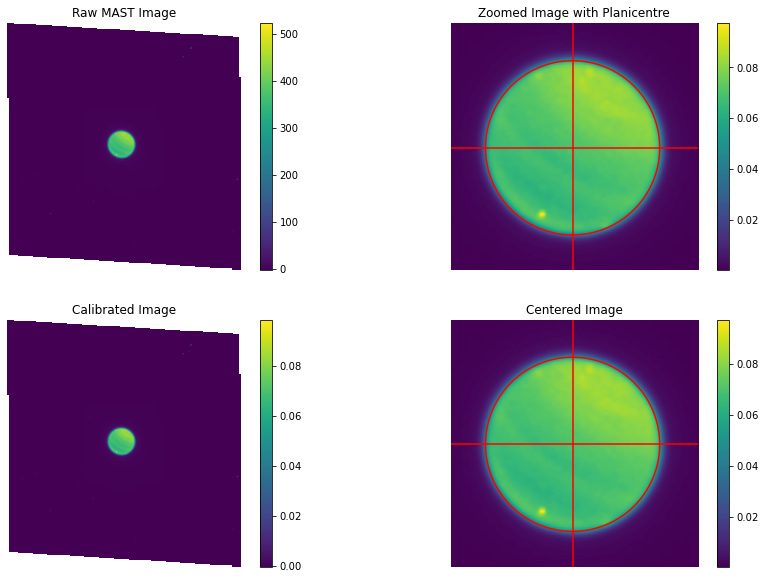

Planicentre is at: (164.48370297207506, 168.0337613360869, 117.8066)
North Polar Correction Angle: -393.0831753295803


In [7]:
Year = '2019'
wavlng = '763'
SolFlux = 1541.91
Filename = 'iduy25mqq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

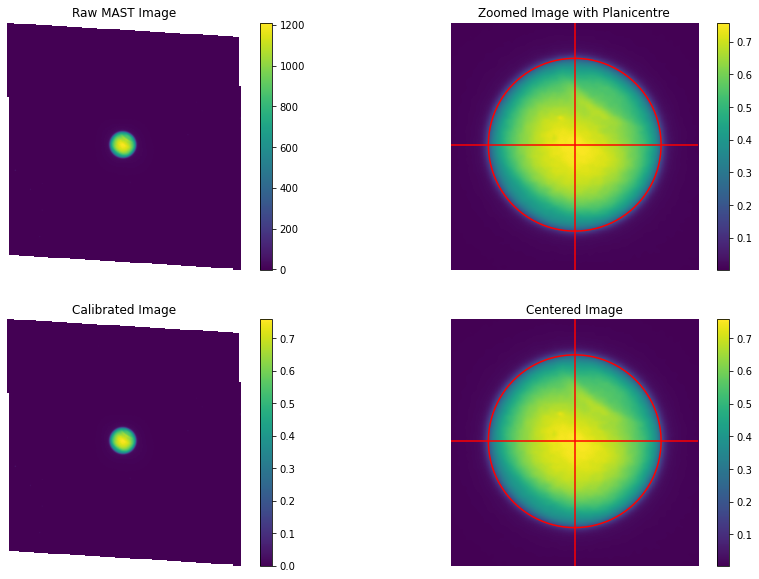

Planicentre is at: (166.35821055738936, 163.58559428924133, 116.0701)
North Polar Correction Angle: -392.9437864468628


In [8]:
Year = '2018'
wavlng = '467'
SolFlux = 2019.04
Filename = 'idg263cvq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

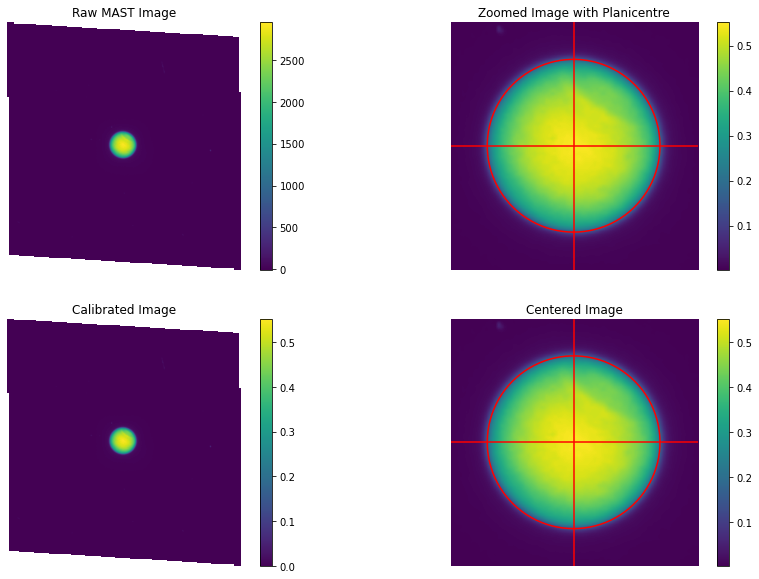

Planicentre is at: (164.85160193674668, 165.09611620480067, 116.07005)
North Polar Correction Angle: -392.9437864477641


In [9]:
Year = '2018'
wavlng = '547'
SolFlux = 1859.82
Filename = 'idg263cwq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

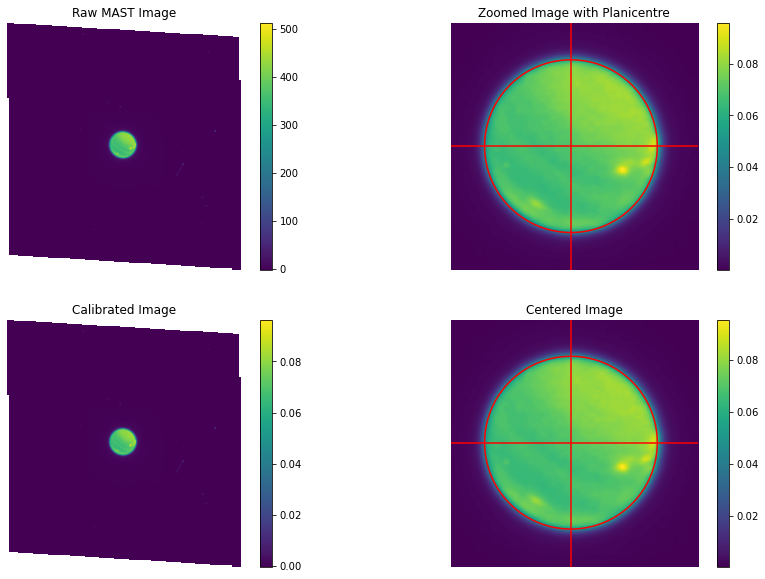

Planicentre is at: (161.2759360509378, 164.94795487576994, 116.06994999999999)
North Polar Correction Angle: -392.9436864495849


In [10]:
Year = '2018'
wavlng = '763'
SolFlux = 1541.91
Filename = 'idg263cyq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

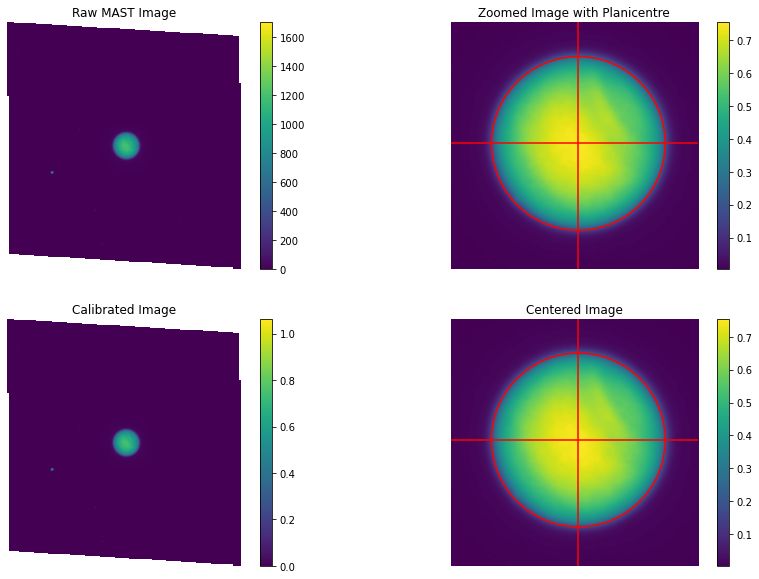

Planicentre is at: (172.3192405661616, 163.06368005041884, 117.3953)
North Polar Correction Angle: -414.7282761000434


In [11]:
Year = '2017'
wavlng = '467'
SolFlux = 2019.04
Filename = 'id9922buq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

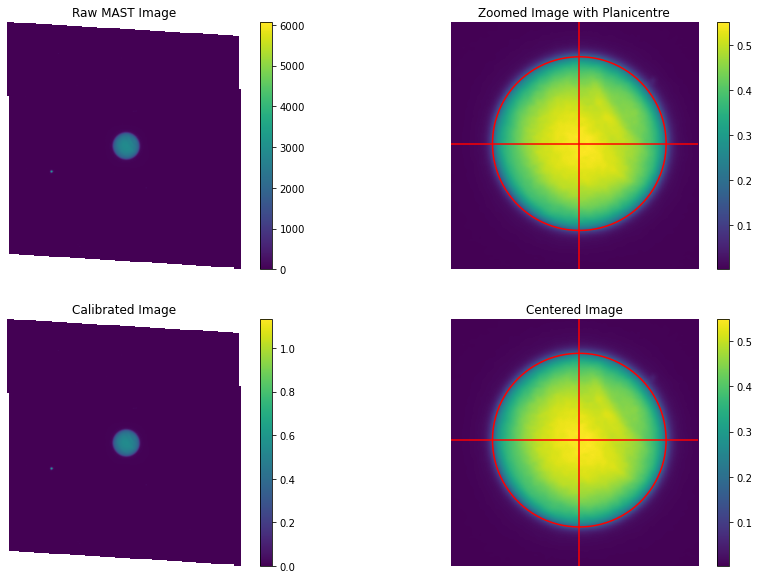

Planicentre is at: (173.54407310177706, 163.49636510500807, 117.39524999999999)
North Polar Correction Angle: -414.72817610211087


In [12]:
Year = '2017'
wavlng = '547'
SolFlux = 1859.82
Filename = 'id9922bvq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

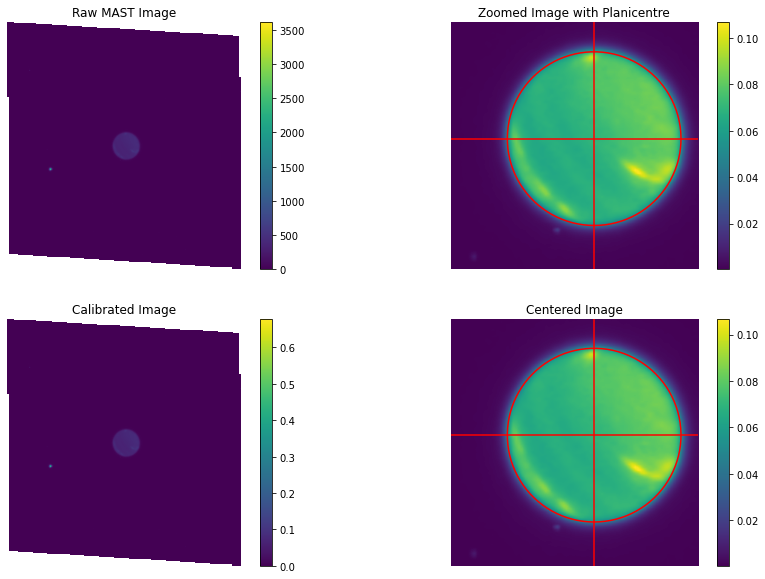

Planicentre is at: (193.61750934221783, 156.78861825221736, 117.3952)
North Polar Correction Angle: -414.7280761062876


In [13]:
Year = '2017'
wavlng = '763'
SolFlux = 1541.91
Filename = 'id9922bxq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

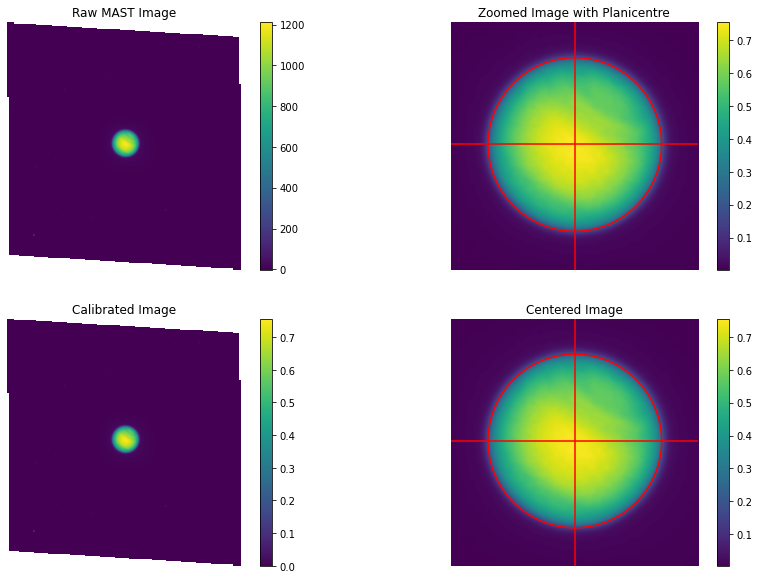

Planicentre is at: (167.50480594378345, 164.41796124071283, 117.36705)
North Polar Correction Angle: -393.5551689334732


In [14]:
Year = '2016'
wavlng = '467'
SolFlux = 2019.04
Filename = 'icwy24jbq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

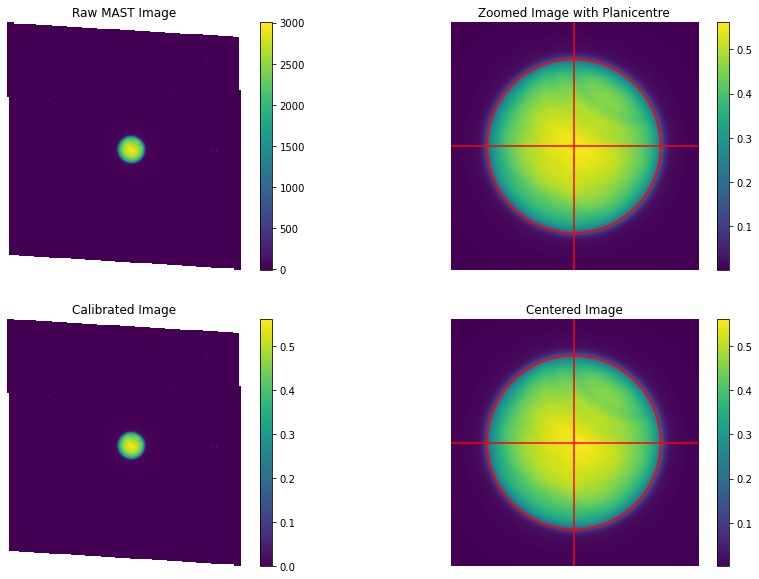

Planicentre is at: (166.1422315641969, 166.53161674548957, 117.36685)
North Polar Correction Angle: -393.55486893277043


In [15]:
Year = '2016'
wavlng = '547'
SolFlux = 1859.82
Filename = 'icwy24jhq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

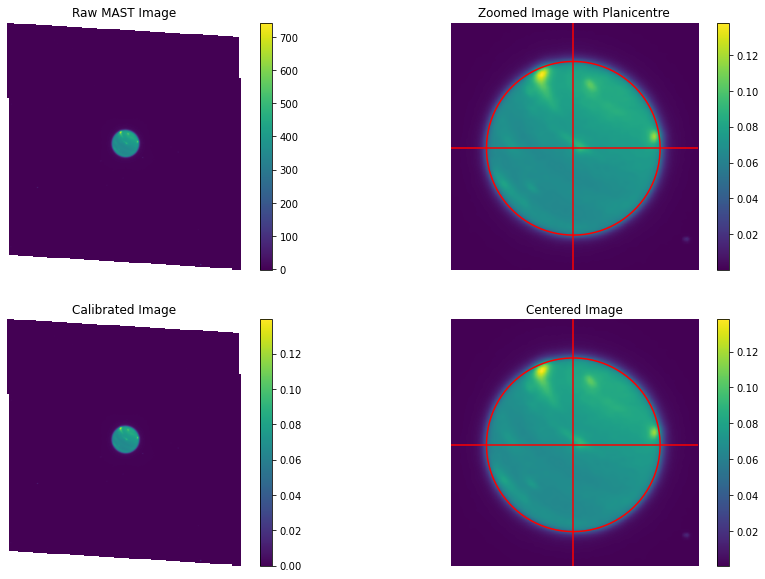

Planicentre is at: (165.4123869454406, 169.46013487606288, 117.36694999999999)
North Polar Correction Angle: -393.5549689397486


In [16]:
Year = '2016'
wavlng = '763'
SolFlux = 1541.91
Filename = 'icwy24jeq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

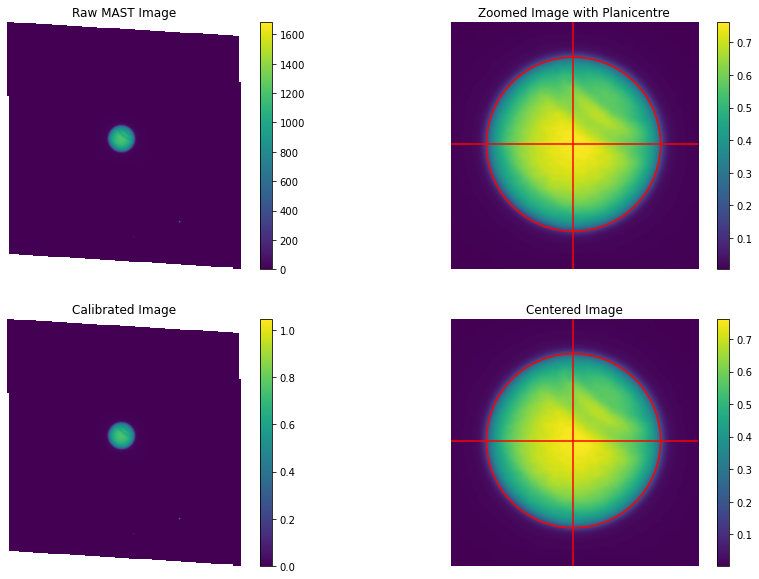

Planicentre is at: (165.686336766566, 164.23805467358477, 117.72469999999998)
North Polar Correction Angle: -397.68653087468215


In [17]:
Year = '2015'
wavlng = '467'
SolFlux = 2019.04
Filename = 'icpf30gqq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

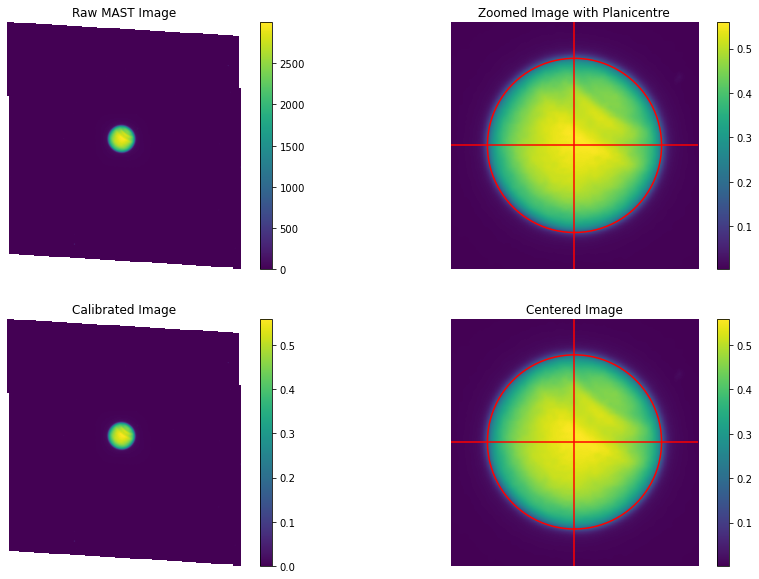

Planicentre is at: (167.02445408315884, 165.90821617309803, 117.72469999999998)
North Polar Correction Angle: -397.6865308770936


In [18]:
Year = '2015'
wavlng = '547'
SolFlux = 1859.82
Filename = 'icpf30grq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

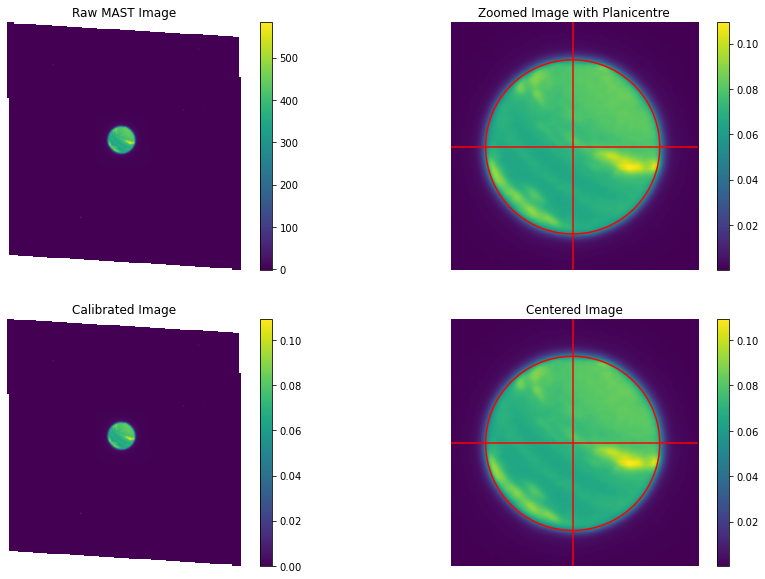

Planicentre is at: (164.59173727392636, 167.6628289105989, 117.72465000000001)
North Polar Correction Angle: -397.686430882218


In [19]:
Year = '2015'
wavlng = '763'
SolFlux = 1541.91
Filename = 'icpf30gtq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

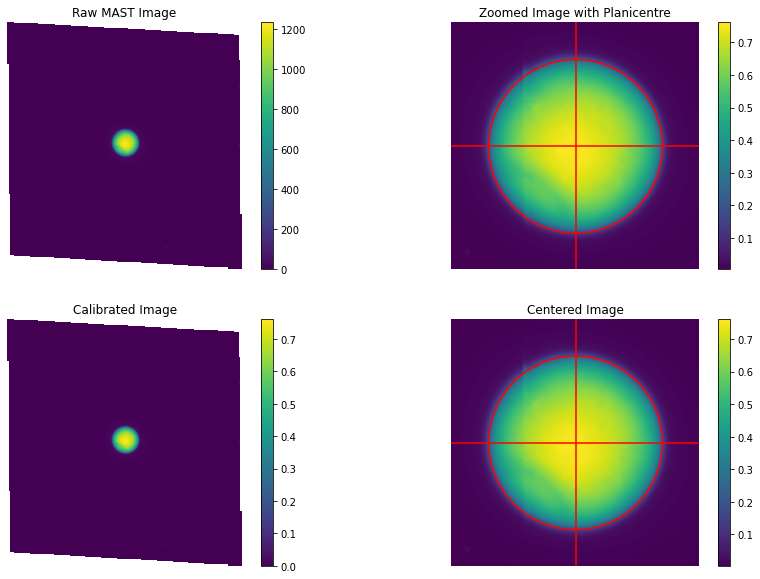

Planicentre is at: (165.25070723245264, 165.0882038964505, 115.99575)
North Polar Correction Angle: -218.3595294378058


In [20]:
Year = '2011'
wavlng = '467'
SolFlux = 2019.04
Filename = 'ibol04etq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

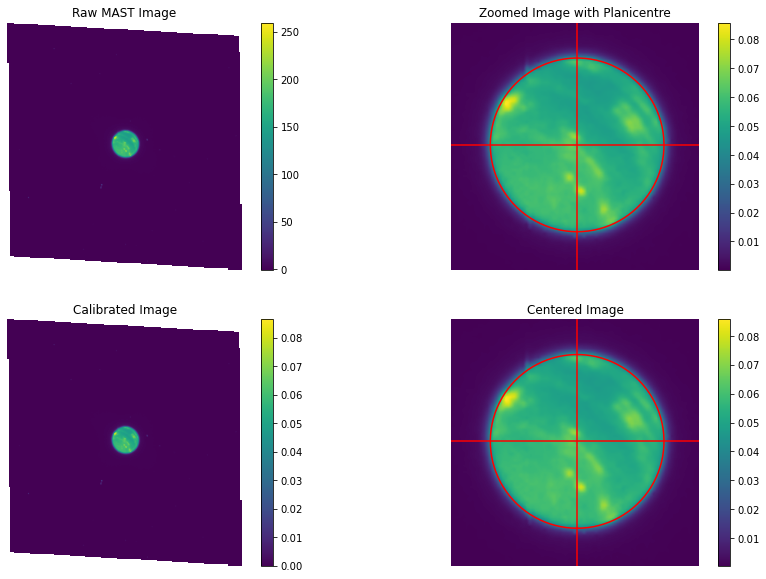

Planicentre is at: (167.36615462100227, 162.9093427348275, 115.99544999999999)
North Polar Correction Angle: -218.3594444426812


In [21]:
#In Year 2011, I was only able to find images in the 467 and 845 nm wavelength bands, sorry!
Year = '2011'
wavlng = '845'
SolFlux = 1023.65
Filename = 'ibol04epq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

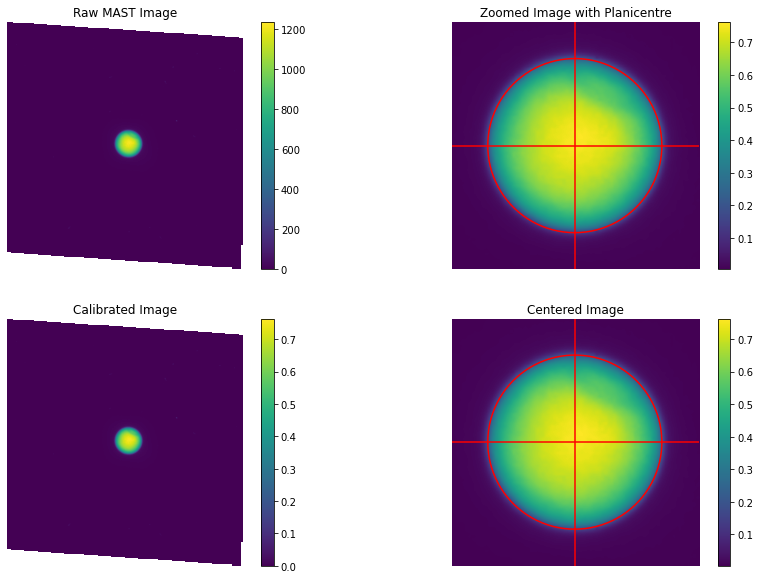

Planicentre is at: (165.61816385943024, 166.1601684341859, 117.66959999999999)
North Polar Correction Angle: -388.52212458278933


In [22]:
Year = '2010'
wavlng = '467'
SolFlux = 2019.04
Filename = 'ib2s16xsq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

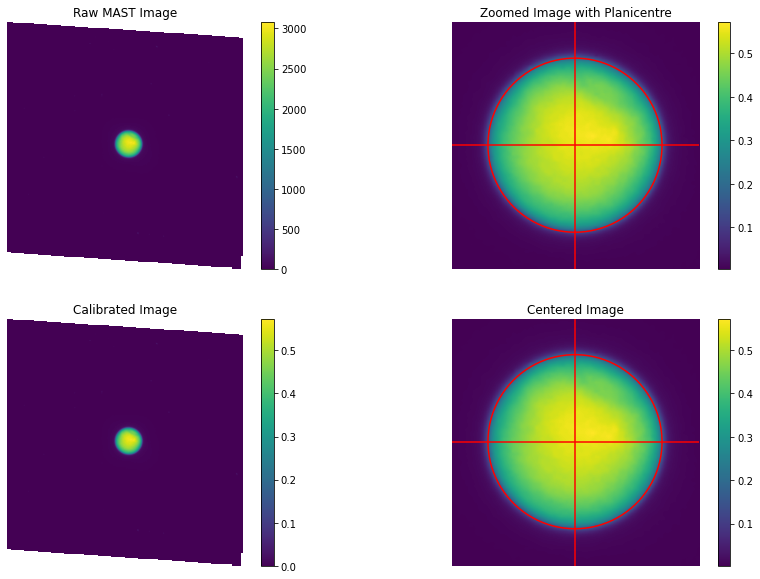

Planicentre is at: (165.86873406966865, 165.5447298715578, 117.66959999999999)
North Polar Correction Angle: -388.52212501021194


In [23]:
Year = '2010'
wavlng = '547'
SolFlux = 1859.82
Filename = 'ib2s16xtq_drz'
Interp = True
croppix = 200
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')

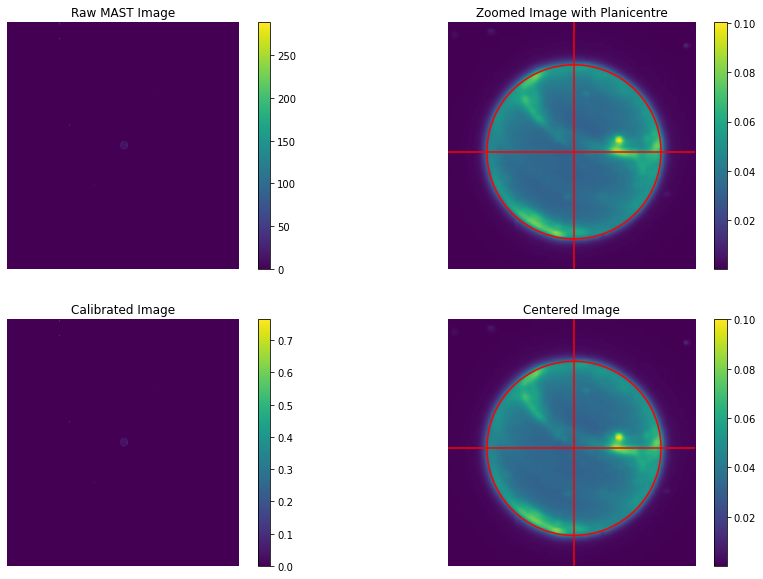

Planicentre is at: (169.6155772874785, 174.69318058066344, 117.66965)
North Polar Correction Angle: -388.51894054566895


In [30]:
Year = '2010'
wavlng = '727'
SolFlux = 1339.23
Filename = 'ib2s16xxq_drz'
Interp = True
croppix = 800
endcrop = 50

img, hdr, scihdr = open_img('data/'+Year+'/'+wavlng+'/'+Filename+'.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])

img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]

IF, pltscl = calc_IF(eph['r'], hdr['PHOTFLAM'], SolFlux)

if Interp :
    img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
    pltscl = pltscl/4
    croppix = croppix*4

plt.figure(figsize=(15,10))
ax1 = plt.subplot(221)
im = ax1.imshow(img, cmap=col)
plt.title('Raw MAST Image')
plt.colorbar(im)
ax1.axis('off')

img = img*IF

ax2 = plt.subplot(223)
im2 = ax2.imshow(img, cmap=col)
plt.title('Calibrated Image')
plt.colorbar(im2)
ax2.axis('off')

rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad,croppix=croppix,endcrop=endcrop,iterations=2)

ax3 = plt.subplot(222)
im3 = ax3.imshow(img, cmap=col)
plt.title('Zoomed Image with Planicentre')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')

center_image(img)

ax3 = plt.subplot(224)
im3 = ax3.imshow(img, cmap=col)
plt.title('Centered Image')
ax3.axhline(planicentre[1],color=xcol)
ax3.axvline(planicentre[0],color=xcol)
ax3.plot(x+planicentre[0], y+planicentre[1],color=xcol)
plt.colorbar(im3)
ax3.axis('off')
plt.show()


ang_corr = float(scihdr['ORIENTAT'])-float(eph['NPole_ang']) #the angle with which to correct the north pole of the image

print('Planicentre is at: '+str(planicentre))
print('North Polar Correction Angle: '+str(ang_corr))

hdu = ast.PrimaryHDU(img) #saves the map to a fits image to be read by the reflectance plotter#
hdu.writeto('MikeFITS/'+Year+'_'+wavlng+'.fits')